<a href="https://colab.research.google.com/github/Fayerwall/Atividade_TAC1/blob/main/Atividade_TAC_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas e dos dados


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dados_cancer = pd.read_csv('/content/_cancer_dataset_uae.csv')

In [5]:
dados_cancer.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160


In [6]:
dados_cancer['Treatment_Start_Date'] = pd.to_datetime(dados_cancer['Treatment_Start_Date'], format = '%Y-%m-%d')
dados_cancer['Diagnosis_Date'] = pd.to_datetime(dados_cancer['Diagnosis_Date'], format = '%Y-%m-%d')

In [7]:
dados_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            10000 non-null  object        
 1   Age                   10000 non-null  int64         
 2   Gender                10000 non-null  object        
 3   Nationality           10000 non-null  object        
 4   Emirate               10000 non-null  object        
 5   Diagnosis_Date        10000 non-null  datetime64[ns]
 6   Cancer_Type           10000 non-null  object        
 7   Cancer_Stage          10000 non-null  object        
 8   Treatment_Type        10000 non-null  object        
 9   Treatment_Start_Date  10000 non-null  datetime64[ns]
 10  Hospital              10000 non-null  object        
 11  Primary_Physician     10000 non-null  object        
 12  Outcome               10000 non-null  object        
 13  Death_Date       

# Qual a quantidade de casos de Cancer por tipo de Cancer? Qual o com mais casos no DataSet?

In [8]:
tipo_cancer = dados_cancer.copy()
tipo_cancer = tipo_cancer[['Patient_ID', 'Cancer_Type']]
tipo_cancer

,Patient_ID,Cancer_Type
0,PAT000001,Liver
1,PAT000002,Leukemia
2,PAT000003,Liver
3,PAT000004,Lung
4,PAT000005,Pancreatic
...,...,...
9995,PAT009996,Ovarian
9996,PAT009997,Ovarian
9997,PAT009998,Lung
9998,PAT009999,Lung


In [9]:
tipo_cancer_contagem = tipo_cancer.groupby('Cancer_Type').count()
tipo_cancer_contagem


,Patient_ID
Cancer_Type,
Breast,1241
Colorectal,1226
Leukemia,1314
Liver,1263
Lung,1233
Ovarian,1259
Pancreatic,1243
Prostate,1221


<ipython-input-70-20a475520e4b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = tipo_cancer_contagem, x = 'Patient_ID', y = tipo_cancer_contagem.index, palette = 'tab10')


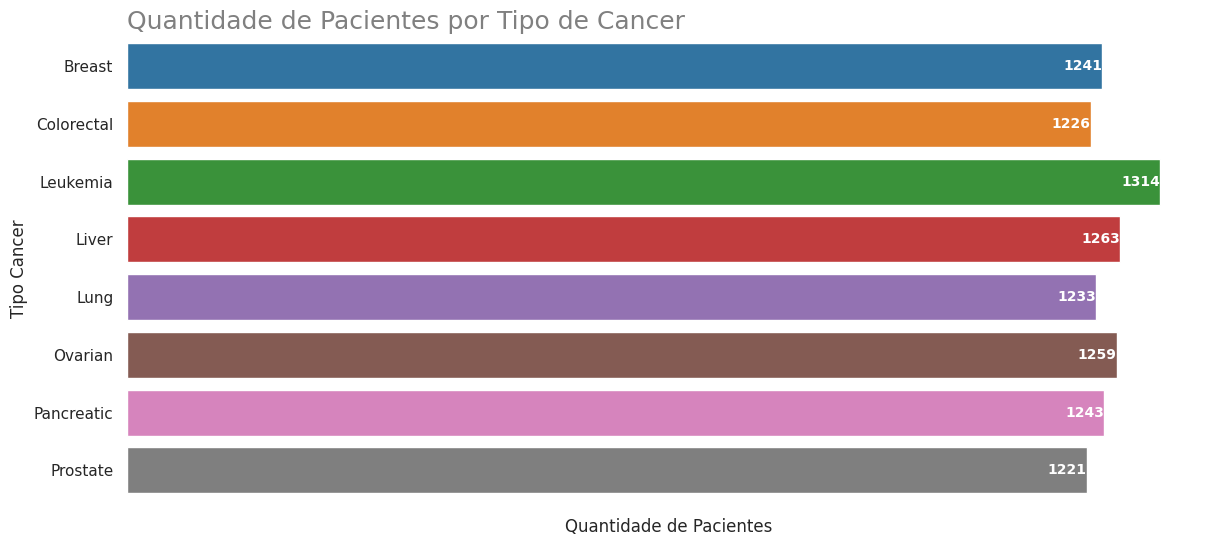

In [70]:
fig, ax = plt.subplots(figsize = (14,6))
sns.set_theme(style = 'white')

ax = sns.barplot(data = tipo_cancer_contagem, x = 'Patient_ID', y = tipo_cancer_contagem.index, palette = 'tab10')
ax.set_title("Quantidade de Pacientes por Tipo de Cancer", fontsize = 18, loc = 'left', color = 'Gray')
ax.set_xlabel("Quantidade de Pacientes")
ax.set_ylabel("Tipo Cancer")
ax.set_xticklabels([])
sns.despine(left = True, bottom = True)

for i, valor in enumerate(tipo_cancer_contagem['Patient_ID']):
  ax.text(valor, i, valor, fontsize = 10,fontweight = 'bold', ha = 'right', va = 'center',color = 'white')

# No tipo de cancer com maior número de casos, em quais estágios se encontram a maior parte dos pacientes?

In [11]:
leukemia = dados_cancer.copy()
leukemia = dados_cancer[['Cancer_Type', 'Cancer_Stage']]

In [12]:
leukemia = leukemia.query('Cancer_Type == "Leukemia"')

In [13]:
leukemia = leukemia.groupby('Cancer_Stage').count()

In [14]:
leukemia

,Cancer_Type
Cancer_Stage,
I,331
II,408
III,394
IV,181


<ipython-input-15-002f2eaf9b15>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = leukemia, x = leukemia.index, y = 'Cancer_Type', palette = 'tab10')


Text(2.7, 300.0, 'Observa-se que, dentre\nos $\\bf{Pacientes}$ com Leucemia,\n a maior parte se encontra\nnos estágios $\\bf{II}$ e $\\bf{III}$')

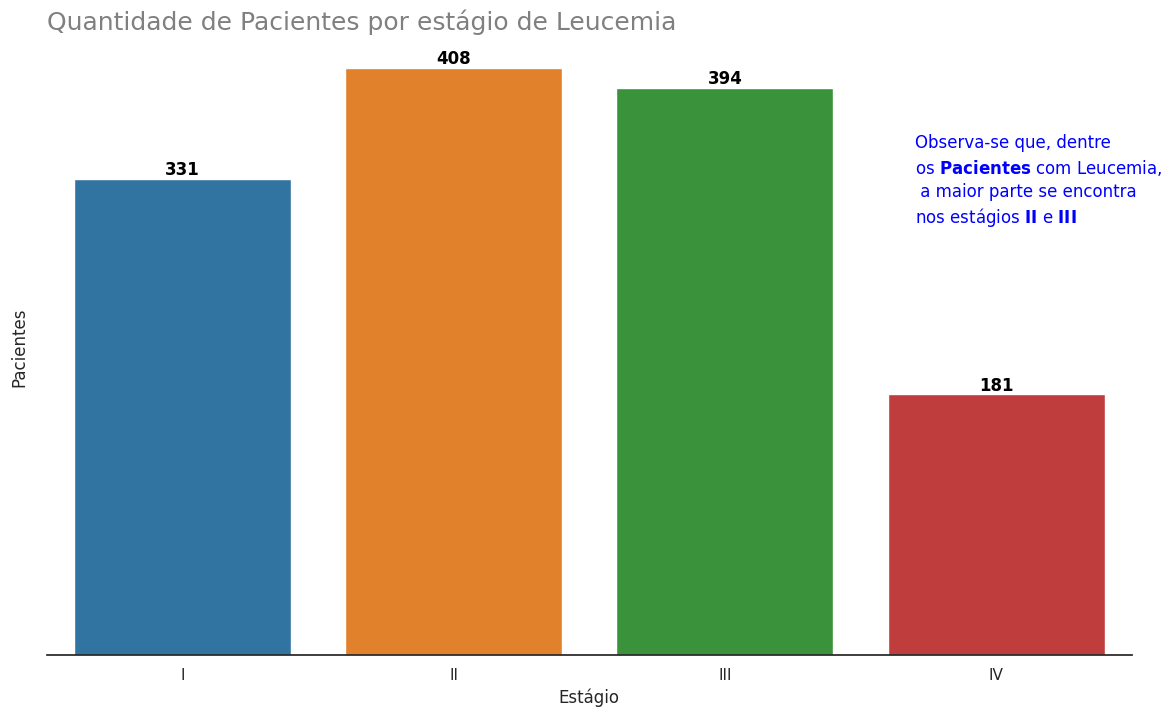

In [15]:
fig, ax = plt.subplots(figsize = (14,8))

ax = sns.barplot(data = leukemia, x = leukemia.index, y = 'Cancer_Type', palette = 'tab10')

ax.set_title("Quantidade de Pacientes por estágio de Leucemia", fontsize = 18, loc = 'left', color = 'gray')
ax.set_ylabel('Pacientes')
ax.set_xlabel('Estágio')
sns.despine(left = True)
ax.set_yticklabels([])
for i, valor in enumerate(leukemia['Cancer_Type']):
  ax.text(i, valor , valor, fontsize = 12, fontweight = 'bold', ha = 'center', va = 'bottom', color = 'black')

ax.text(2.7, 3e2, 'Observa-se que, dentre'
                  '\nos $\\bf{Pacientes}$ com Leucemia,'
                  '\n a maior parte se encontra'
                  '\nnos estágios $\\bf{II}$ e $\\bf{III}$',
         color ='blue',linespacing = 1.35)

# Separando os casos com pacientes homens, por tipo de tratamento, o que podemos observar?

In [16]:
tratamento_homens = dados_cancer.copy()
tratamento_homens = tratamento_homens[['Gender','Treatment_Type', 'Outcome']]
tratamento_homens.head()

,Gender,Treatment_Type,Outcome
0,Female,Radiation,Recovered
1,Male,Surgery,Recovered
2,Male,Radiation,Under Treatment
3,Female,Radiation,Recovered
4,Female,Chemotherapy,Recovered


In [17]:
tratamento_homens = tratamento_homens.query('Gender == "Male"')
tratamento_homens.head()

,Gender,Treatment_Type,Outcome
1,Male,Surgery,Recovered
2,Male,Radiation,Under Treatment
6,Male,Chemotherapy,Recovered
7,Male,Surgery,Under Treatment
10,Male,Chemotherapy,Under Treatment


In [45]:
tratamento_homens_contagem = pd.crosstab(index = tratamento_homens.Treatment_Type, columns = tratamento_homens.Outcome,values = tratamento_homens.Gender , aggfunc = 'count', normalize = 'index')

In [46]:
tratamento_homens_contagem

Outcome,Deceased,Recovered,Under Treatment
Treatment_Type,,,
Chemotherapy,0.113065,0.489112,0.397822
Immunotherapy,0.098214,0.491071,0.410714
Radiation,0.092851,0.494659,0.412490
Surgery,0.102196,0.504223,0.393581


Text(3.28, 0.05, '10.12%')

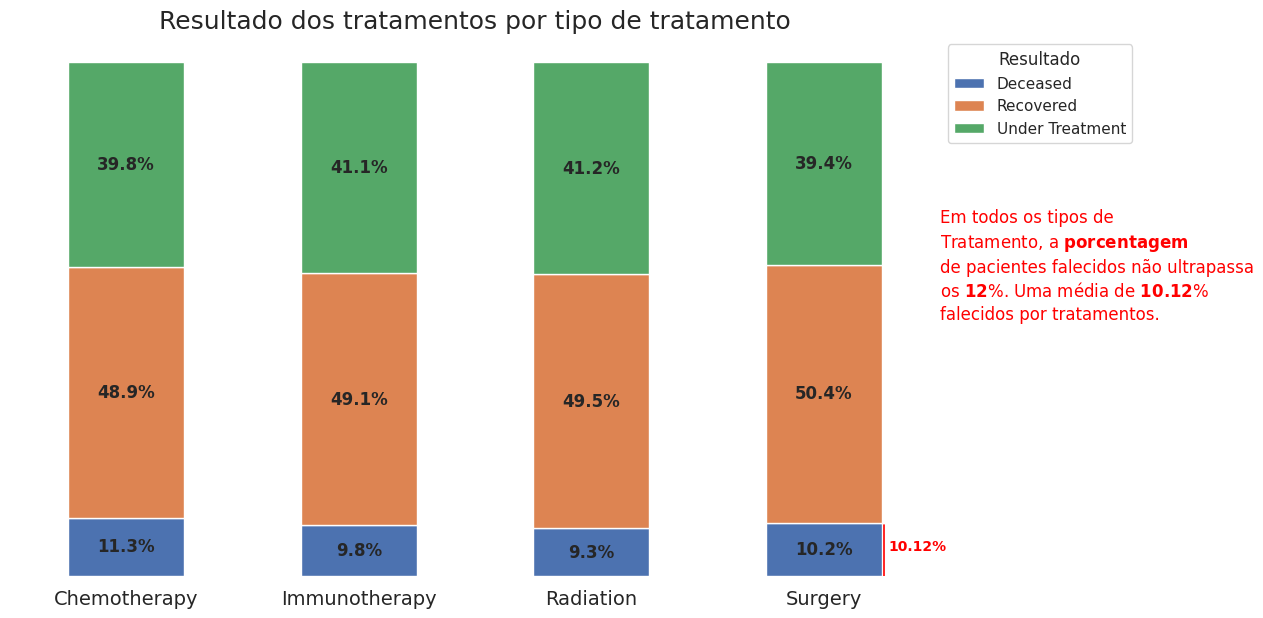

In [69]:
sns.set_theme(style = 'white')

ax = tratamento_homens_contagem.plot(kind = 'bar', stacked = True, figsize = (12,7))
ax.set_title("Resultado dos tratamentos por tipo de tratamento", fontsize = 18)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_frame_on(False)
ax.set_yticklabels('')
ax.xaxis.set_tick_params(labelsize = 14, rotation = 0)

ax.legend(bbox_to_anchor = (1,1),title = 'Resultado')

for container in ax.containers:
  labels = [f'{valor.get_height()*100:.1f}%' for valor in container]
  ax.bar_label(container, label_type= 'center',fontweight = 'bold', labels = labels)

ax.text(3.5,0.5,'Em todos os tipos de\n'
              'Tratamento, a $\\bf{porcentagem}$\n'
              'de pacientes falecidos não ultrapassa\n'
              'os $\\bf{12}$%. Uma média de $\\bf{10.12}$%\n'
              'falecidos por tratamentos.'
              , color = 'red', fontsize = 12, linespacing = 1.35
              )

ax.axvline(3.26,ymin = 0, ymax = 0.095, color = 'red', linewidth = 1.2)
ax.text(3.28,0.05,'10.12%', fontweight = 'bold', fontsize = 10, color = 'red')

In [87]:
dados_cancer.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160


# Dos casos de morte por cancer, pacientes no estágio mais avançado tiveram maior número? Como podemos comparar esses números?

In [88]:
mortos_por_estagio = dados_cancer.copy()
mortos_por_estagio = dados_cancer[['Outcome','Cancer_Stage','Cause_of_Death']]
mortos_por_estagio

,Outcome,Cancer_Stage,Cause_of_Death
0,Recovered,II,NaN
1,Recovered,III,NaN
2,Under Treatment,III,NaN
3,Recovered,III,NaN
4,Recovered,II,NaN
...,...,...,...
9995,Recovered,II,NaN
9996,Under Treatment,III,NaN
9997,Under Treatment,III,NaN
9998,Recovered,IV,NaN


In [89]:
mortos_por_estagio = mortos_por_estagio.query('Outcome == "Deceased" and Cause_of_Death == "Cancer"')
mortos_por_estagio

,Outcome,Cancer_Stage,Cause_of_Death
8,Deceased,III,Cancer
17,Deceased,I,Cancer
38,Deceased,I,Cancer
54,Deceased,I,Cancer
67,Deceased,III,Cancer
...,...,...,...
9865,Deceased,II,Cancer
9945,Deceased,IV,Cancer
9958,Deceased,III,Cancer
9988,Deceased,IV,Cancer


In [91]:
mortos_por_estagio.drop(columns = ['Cause_of_Death'], inplace = True)
mortos_por_estagio = mortos_por_estagio.groupby('Cancer_Stage').count()
mortos_por_estagio

<ipython-input-91-247408244a2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortos_por_estagio.drop(columns = ['Cause_of_Death'], inplace = True)


,Outcome
Cancer_Stage,
I,117
II,122
III,161
IV,85


<ipython-input-115-00c9d843b2cf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot( data = mortos_por_estagio, x = mortos_por_estagio.index,y = mortos_por_estagio['Outcome'],palette = 'tab10')


Text(2.7, 110.0, 'O estágio $\\bf{mais}$ $\\bf{avançado}$\nde cancer, é responsável por\nmenos da $\\bf{metade}$ dos casos\nde morte.O estágio $\\bf{III}$, sozinho,\ntem praticamente o dobro de casos.')

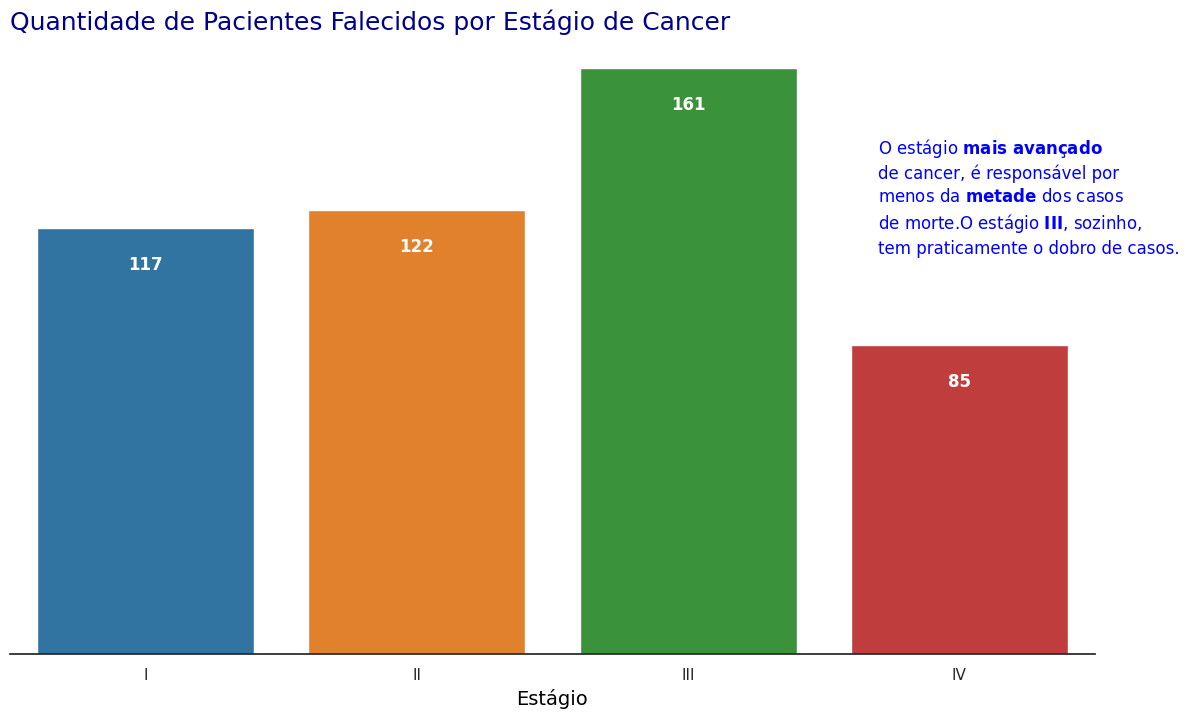

In [115]:
fig, ax = plt.subplots(figsize = (14,8))

ax = sns.barplot( data = mortos_por_estagio, x = mortos_por_estagio.index,y = mortos_por_estagio['Outcome'],palette = 'tab10')
ax.set_title('Quantidade de Pacientes Falecidos por Estágio de Cancer', fontsize = 18, loc = 'left', color = 'darkblue')
ax.set_xlabel('Estágio', fontsize = 14, color = 'black')
ax.set_ylabel('')
sns.despine(left = True)
ax.set_yticklabels([])

for i, valor in enumerate(mortos_por_estagio['Outcome']):
  ax.text(i, valor - 1e1, valor,fontsize = 12, fontweight = 'bold', ha = 'center', va = 'center', color = 'white')

ax.text(2.7,1.1e2,'O estágio $\\bf{mais}$ $\\bf{avançado}$\n'
            'de cancer, é responsável por\n'
            'menos da $\\bf{metade}$ dos casos\n'
            'de morte.O estágio $\\bf{III}$, sozinho,\n'
            'tem praticamente o dobro de casos.'
            , color = 'blue', fontsize = 12, linespacing = 1.35
            )